In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# Project Introduction

## Overview

This project is part of the Kaggle competition 'Natural Language Processing with Disaster Tweets'. The goal of the competition is to classify whether a tweet is about a real disaster or not. The dataset contains tweets that may relate to disasters, and the task is to predict if the tweet indicates a real disaster (1) or if it is not related (0).

## Dataset Description

The dataset includes the following files:

- `train.csv`: The training set, containing labeled data to build and train the model.
- `test.csv`: The test set, which we use for making predictions.
- `sample_submission.csv`: A sample submission file showing the correct format for the predictions.

Each sample in the dataset has the following features:
- **id**: A unique identifier for each tweet.
- **text**: The content of the tweet.
- **location**: The location the tweet was sent from (this field may be blank).
- **keyword**: A keyword extracted from the tweet (this field may also be blank).
- **target**: This column is only in the `train.csv` file and indicates whether the tweet is about a real disaster (1) or not (0).

## Objective

The objective of this competition is to build a model that can accurately predict whether a given tweet is about a real disaster based on the text content. For this purpose, natural language processing (NLP) techniques will be used to transform and classify the text data.

## Approach

1. **Exploratory Data Analysis (EDA)**: I will begin by exploring the dataset, visualizing the distribution of classes, and cleaning the data if necessary.
2. **Feature Engineering**: I will extract and preprocess relevant features from the text, such as removing special characters, tokenization, and applying word embeddings like TF-IDF or Word2Vec.
3. **Model Building**: I will experiment with different model architectures such as LSTM or GRU to develop a sequential neural network suitable for text classification.
4. **Evaluation**: The model’s performance will be evaluated based on its accuracy in predicting the correct labels for the test set.



# Exploratory Data Analysis (EDA)

In this section, I will explore the dataset to understand its structure and identify any necessary cleaning procedures. EDA helps in visualizing and inspecting the data to gain insights that will guide the feature engineering and model development process.

## Data Inspection

I will begin by inspecting the training dataset. This involves:
- Displaying the first few rows of the training dataset to understand its structure.
- Checking for missing values in each column (`text`, `location`, `keyword`, and `target`).
- Examining the distribution of the target variable to see if the dataset is balanced.

In [2]:
# Import necessary libraries
import pandas as pd

# Load the training dataset
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

# Display the first few rows of the dataset
print("First few rows of the training dataset:")
print(train.head())

# Check for missing values in each column
print("\nMissing values in each column:")
print(train.isnull().sum())

# Display basic information about the dataset (data types and non-null counts)
print("\nBasic information about the dataset:")
print(train.info())

# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(train.describe())


First few rows of the training dataset:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Missing values in each column:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object

The initial inspection of the dataset reveals the following:

**First few rows**:
   - The dataset contains columns: `id`, `keyword`, `location`, `text`, and `target`.
   - The `text` column holds the tweet content, which is crucial for our analysis.
   - The `keyword` and `location` columns contain some missing values, which we may need to address during the cleaning phase.

**Missing Values**:
   - The `keyword` column has 61 missing values, and the `location` column has 2,533 missing values out of 7,613 entries.
   - The high number of missing values in the `location` column suggests that it may not be as useful for our analysis, and we might consider dropping it or filling it with a placeholder value.
   - The `keyword` column has relatively fewer missing values, so it may still be valuable. We could handle the missing values by either filling them with 'unknown' or simply dropping those rows.

**Data Types and Structure**:
   - The `id` and `target` columns are of type `int64`, while the `keyword`, `location`, and `text` columns are of type `object`.
   - The dataset consists of 7,613 rows and 5 columns, with the `target` column indicating the label (1 for disaster-related tweets, 0 otherwise).

**Target Variable Distribution**:
   - The summary statistics show that the mean value of the `target` column is approximately 0.43, suggesting a class imbalance since disaster-related tweets (1) appear less frequently than non-disaster tweets (0).


## Visualizing the Target Variable

Next, I will visualize the distribution of the target variable (`target`). The target variable contains values of `0` (not a disaster) and `1` (disaster). 

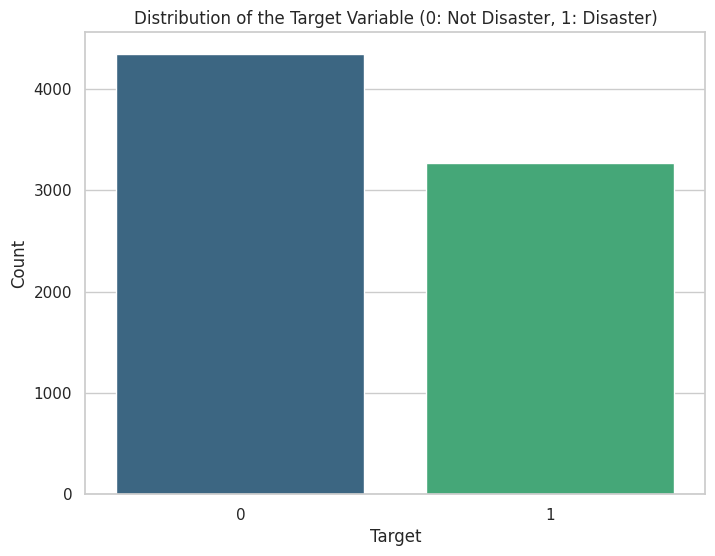

In [3]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train, palette='viridis')
plt.title('Distribution of the Target Variable (0: Not Disaster, 1: Disaster)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

## Keyword Frequency Analysis

The `keyword` column contains specific words associated with each tweet. I will create a visualization to show the frequency of keywords in the dataset.

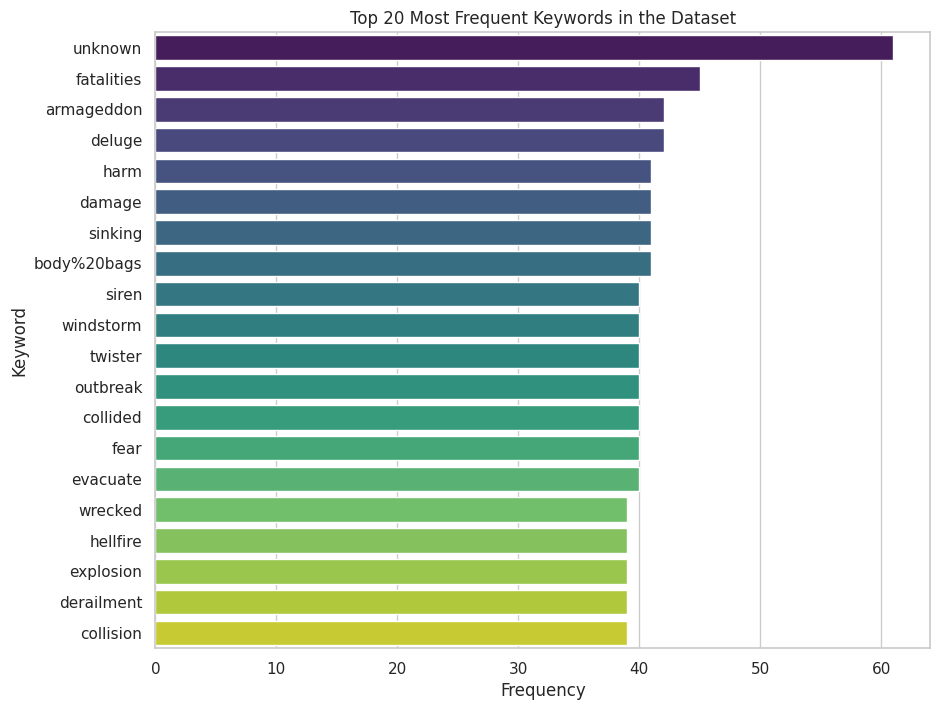

In [4]:
# Fill missing values in the 'keyword' column with 'unknown' using an alternative approach
train['keyword'] = train['keyword'].fillna('unknown')

# Count the frequency of each keyword and sort them in descending order
keyword_counts = train['keyword'].value_counts().head(20)  # Top 20 keywords

# Visualize the top 20 most frequent keywords
plt.figure(figsize=(10, 8))
sns.barplot(x=keyword_counts.values, y=keyword_counts.index, palette='viridis')
plt.title('Top 20 Most Frequent Keywords in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()


**High Frequency of 'unknown'**:
   - The most frequent entry in the `keyword` column is 'unknown', indicating that many tweets lack a specific keyword. This may reduce the effectiveness of using the keyword feature alone for classification, and we might need to explore combining it with other features like text content to improve accuracy.

**Common Disaster-related Keywords**:
   - Many of the top keywords such as 'fatalities,' 'deluge,' 'armageddon,' 'sinking,' and 'damage' are strongly associated with disasters. These keywords could be important features for identifying disaster-related tweets.
   - These keywords appear to describe severe or life-threatening situations, which align with the nature of disaster events.

**Diverse Nature of Keywords**:
   - The diversity in keywords (e.g., 'twister,' 'evacuate,' 'outbreak,' 'weapons') indicates that the dataset covers various types of disaster scenarios, including natural disasters, emergencies, and human-related incidents. This diversity should be considered when designing the model, as the features might need to capture these different contexts effectively.

## Data Cleaning Plan

Based on the inspection, I will perform the following data cleaning steps:

**Filling Missing Values**:
   - I filled the missing values in the `keyword` column with the value 'unknown' to retain the rows with missing keywords.
   - The `location` column was left as is for now, as it may not have significant impact on the text-based analysis.

**Text Cleaning**:
   - Special characters and numbers were removed from the tweet text.
   - The text was converted to lowercase to maintain uniformity.
   - Tokenization was applied to split the text into individual words.
   - Stopwords were removed, and stemming was performed to reduce words to their root form, which helps reduce the dimensionality of the dataset and focuses on the core meaning of the words.


In [5]:
# Import necessary libraries for text cleaning
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Instantiate the stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and perform stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

# Apply the clean_text function to the 'text' column in the dataset
train['cleaned_text'] = train['text'].apply(clean_text)

# Display the first few rows of the dataset to verify the changes
print("First few rows after text cleaning:")
print(train[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
First few rows after text cleaning:
                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   

                                        cleaned_text  
0          deed reason earthquak may allah forgiv us  
1               forest fire near la rong sask canada  
2  resid ask shelter place notifi offic evacu she...  
3        peopl receiv wildfir evacu order california  
4  got sent photo rubi alaska smoke wildfir pour ...  


# Feature Engineering

In this section, I will describe the model architecture used for the disaster tweet classification problem. The approach involves converting the cleaned text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) and then building a neural network for classification.

## Feature Extraction using TF-IDF

To transform the text data into numerical form, I will use TF-IDF. TF-IDF is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents (corpus). It works by multiplying two components:
- **Term Frequency (TF)**: The number of times a word appears in a document, normalized by the total number of words.
- **Inverse Document Frequency (IDF)**: The logarithm of the total number of documents divided by the number of documents containing the word. This helps reduce the weight of common words that appear frequently across documents.

By applying TF-IDF, I can create a matrix representation of the text data, where each row corresponds to a tweet and each column represents a term. This matrix will serve as input to the neural network.


In [6]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features to manage dimensionality

# Fit and transform the 'cleaned_text' column
tfidf_matrix = tfidf_vectorizer.fit_transform(train['cleaned_text'])

# Convert the result to a dense array and display the shape
tfidf_array = tfidf_matrix.toarray()
print("TF-IDF Matrix shape:", tfidf_array.shape)

# Display the first few rows of the TF-IDF matrix to verify
print("First few rows of the TF-IDF matrix:")
print(tfidf_array[:5])

TF-IDF Matrix shape: (7613, 5000)
First few rows of the TF-IDF matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##  Neural Network Model Architecture

The neural network model will be a simple feedforward network designed as follows:
- **Input Layer**: The input will be the TF-IDF matrix representing the tweets. Each feature corresponds to the TF-IDF score of a word in the tweet.
- **Hidden Layer(s)**: I will experiment with one or two hidden layers with ReLU (Rectified Linear Unit) activation functions. These layers will capture patterns and relationships in the tweet data.
- **Dropout Layer**: I will add a dropout layer after each hidden layer to prevent overfitting.
- **Output Layer**: The output layer will have a single neuron with a Sigmoid activation function to predict the probability that a tweet is related to a disaster (1) or not (0).

In [7]:
# Import necessary libraries for building the neural network
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(tfidf_array, train['target'], test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential()
model.add(Input(shape=(5000,)))  # Define the input shape based on the number of features
model.add(Dense(64, activation='relu'))  # Input layer with 64 neurons
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer with a sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,177 (1.23 MB)

 Trainable params: 322,177 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1730030823.381975      68 service.cc:145] XLA service 0x796dbc006b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730030823.382029      68 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 90/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5643 - loss: 0.6861

I0000 00:00:1730030826.477224      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5932 - loss: 0.6710 - val_accuracy: 0.7912 - val_loss: 0.4965
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.4348 - val_accuracy: 0.7958 - val_loss: 0.4596
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3360 - val_accuracy: 0.7814 - val_loss: 0.4907
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9068 - loss: 0.2568 - val_accuracy: 0.7708 - val_loss: 0.5340
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9235 - loss: 0.2074 - val_accuracy: 0.7656 - val_loss: 0.5912
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9381 - loss: 0.1719 - val_accuracy: 0.7597 - val_loss: 0.6567
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9455 - loss: 0.1563 - val_accuracy: 0.7538 - val_loss: 0.7150
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9556 - loss: 0.1313 - val_accuracy: 0.7551 - val

## Model Architecture: LSTM and GRU

To improve the performance and address the issue of overfitting, I will experiment with more complex neural network architectures using LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit). These architectures are well-suited for text data because they can capture sequential information and long-term dependencies.

### LSTM and GRU

LSTM and GRU are types of recurrent neural networks (RNNs) that are specifically designed to overcome the limitations of traditional RNNs. They have mechanisms such as gates that help retain important information over long sequences while discarding irrelevant data. 

In [8]:
# Import necessary libraries for LSTM and GRU
from tensorflow.keras.layers import LSTM, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define function to build and compile LSTM model
def build_lstm_model():
    model = Sequential()
    model.add(Input(shape=(5000,)))  # Define the input shape
    model.add(Dense(128, activation='relu'))  # Dense layer to process TF-IDF features
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Define function to build and compile GRU model
def build_gru_model():
    model = Sequential()
    model.add(Input(shape=(5000,)))  # Define the input shape
    model.add(Dense(128, activation='relu'))  # Dense layer to process TF-IDF features
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# Callbacks to prevent overfitting and optimize training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Train the LSTM model
print("Training LSTM model...")
lstm_model = build_lstm_model()
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Train the GRU model
print("\nTraining GRU model...")
gru_model = build_gru_model()
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

Training LSTM model...
Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5893 - loss: 0.6604 - val_accuracy: 0.7945 - val_loss: 0.4614 - learning_rate: 0.0010
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.3827 - val_accuracy: 0.7846 - val_loss: 0.4599 - learning_rate: 0.0010
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8921 - loss: 0.2771 - val_accuracy: 0.7715 - val_loss: 0.5066 - learning_rate: 0.0010
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9162 - loss: 0.2179 - val_accuracy: 0.7669 - val_loss: 0.5870 - learning_rate: 0.0010
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9447 - loss: 0.1562 - val_accuracy: 0.7597 - val_loss: 0.6224 - learning_rate: 2.0000e-04

Training GRU model...
Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5976 - loss: 0.6591 - val_accuracy: 0.7945 - val_loss: 0.4708 - learning_rate: 0.0010
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━

## Model Improvement: LSTM and GRU

To address the overfitting observed in the previous models and to improve performance, I will enhance the LSTM and GRU models by making architectural changes and adjusting hyperparameters. Below is the strategy I will use for these improvements:

### Model Architecture Improvement

I will increase the capacity of the models by:
- Adding more neurons in each hidden layer to allow the model to learn more complex patterns.
- Adding a hidden layer for deeper representation learning.
- Keeping dropout layers between the hidden layers to prevent overfitting. The dropout rate will be set to 0.5, which means half of the neurons will be randomly deactivated during training to improve generalization.

### Hyperparameter Tuning

To optimize the training process and achieve better generalization:
- **Early Stopping**: I will use early stopping with an increased patience of 5 epochs. This will allow the model to continue training for a few more epochs if it shows potential for improvement before stopping.
- **Learning Rate Scheduler**: I will apply a learning rate scheduler to dynamically adjust the learning rate when the validation loss plateaus. The model can converge more smoothly by reducing the learning rate when the performance stabilizes.

### Training Configuration

The models will be trained for a maximum of 30 epochs, but with early stopping enabled, the training may halt early if no improvement is observed. The batch size remains at 32, as it balances training speed and performance well.

In [10]:
# Define function to build and compile the improved LSTM model
def build_improved_lstm_model():
    model = Sequential()
    model.add(Input(shape=(5000,)))  # Define the input shape
    model.add(Dense(256, activation='relu'))  # Increase the number of neurons
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define function to build and compile the improved GRU model
def build_improved_gru_model():
    model = Sequential()
    model.add(Input(shape=(5000,)))  # Define the input shape
    model.add(Dense(256, activation='relu'))  # Increase the number of neurons
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# Callbacks to prevent overfitting and optimize training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the improved LSTM model
print("Training Improved LSTM model...")
improved_lstm_model = build_improved_lstm_model()
improved_lstm_history = improved_lstm_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Train the improved GRU model
print("\nTraining Improved GRU model...")
improved_gru_model = build_improved_gru_model()
improved_gru_history = improved_gru_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

Training Improved LSTM model...
Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.5706 - loss: 0.6654 - val_accuracy: 0.7925 - val_loss: 0.4647 - learning_rate: 0.0010
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.3784 - val_accuracy: 0.7820 - val_loss: 0.4838 - learning_rate: 0.0010
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9037 - loss: 0.2696 - val_accuracy: 0.7663 - val_loss: 0.5467 - learning_rate: 0.0010
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9326 - loss: 0.1883 - val_accuracy: 0.7636 - val_loss: 0.6489 - learning_rate: 0.0010
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9616 - loss: 0.1266 - val_accuracy: 0.7597 - val_loss: 0.7691 - learning_rate: 2.0000e-04
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.1053 - val_accuracy: 0.7623 - val_loss: 0.8321 - learning_rate: 2.0000e-04

Training Improved GRU model...
Epoch 1/30
191

In [12]:
# Train the improved LSTM model with a batch size of 64
print("Training Improved LSTM model with batch size 64...")
improved_lstm_model_bs64 = build_improved_lstm_model()
improved_lstm_history_bs64 = improved_lstm_model_bs64.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,  # Changed batch size to 64
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Train the improved GRU model with a batch size of 64
print("\nTraining Improved GRU model with batch size 64...")
improved_gru_model_bs64 = build_improved_gru_model()
improved_gru_history_bs64 = improved_gru_model_bs64.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,  # Changed batch size to 64
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

Training Improved LSTM model with batch size 64...
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.5663 - loss: 0.6760 - val_accuracy: 0.7840 - val_loss: 0.5299 - learning_rate: 0.0010
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8267 - loss: 0.4304 - val_accuracy: 0.7932 - val_loss: 0.4604 - learning_rate: 0.0010
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8910 - loss: 0.2856 - val_accuracy: 0.7886 - val_loss: 0.5161 - learning_rate: 0.0010
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9342 - loss: 0.1903 - val_accuracy: 0.7623 - val_loss: 0.6191 - learning_rate: 0.0010
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9537 - loss: 0.1408 - val_accuracy: 0.7630 - val_loss: 0.7615 - learning_rate: 0.0010
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9683 - loss: 0.0901 - val_accuracy: 0.7511 - val_loss: 0.8016 - learning_rate: 2.0000e-04
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

Performance Comparison Table:


,Epoch,Simple Model Val Accuracy,Simple Model Val Loss,Simple LSTM Val Accuracy,Simple LSTM Val Loss,Simple GRU Val Accuracy,Simple GRU Val Loss,Improved LSTM Val Accuracy (BS64),Improved LSTM Val Loss (BS64),Improved GRU Val Accuracy (BS64),Improved GRU Val Loss (BS64)
0,1,0.791202,0.496490,0.794485,0.461391,0.794485,0.470841,0.783979,0.529873,0.778726,0.515469
1,2,0.795798,0.459582,0.784636,0.459926,0.787919,0.463400,0.793171,0.460365,0.787919,0.459397
2,3,0.781353,0.490671,0.771504,0.506576,0.772817,0.513722,0.788575,0.516139,0.766251,0.532228


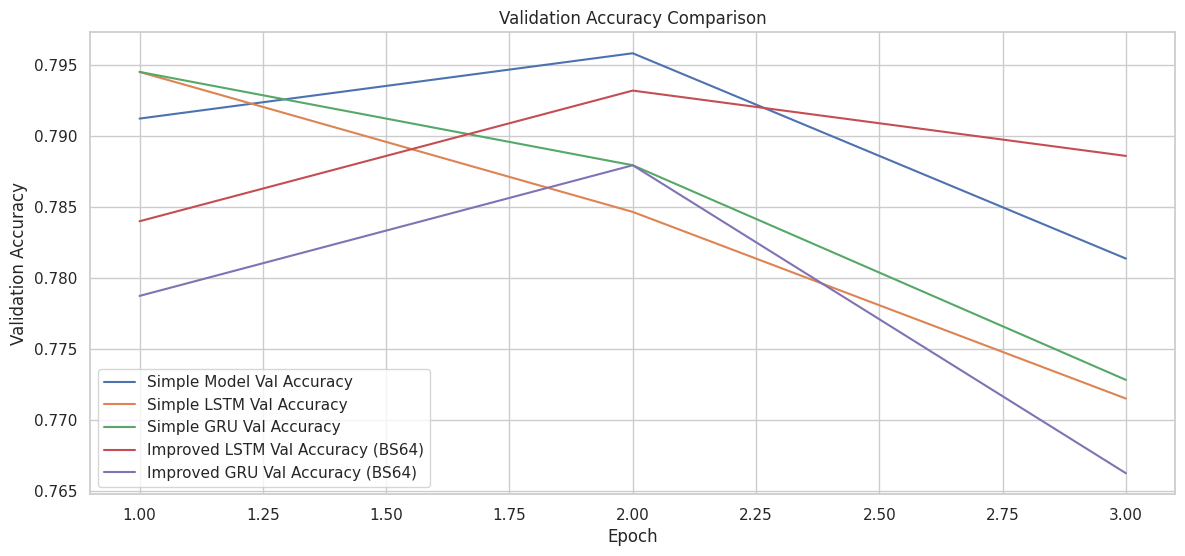

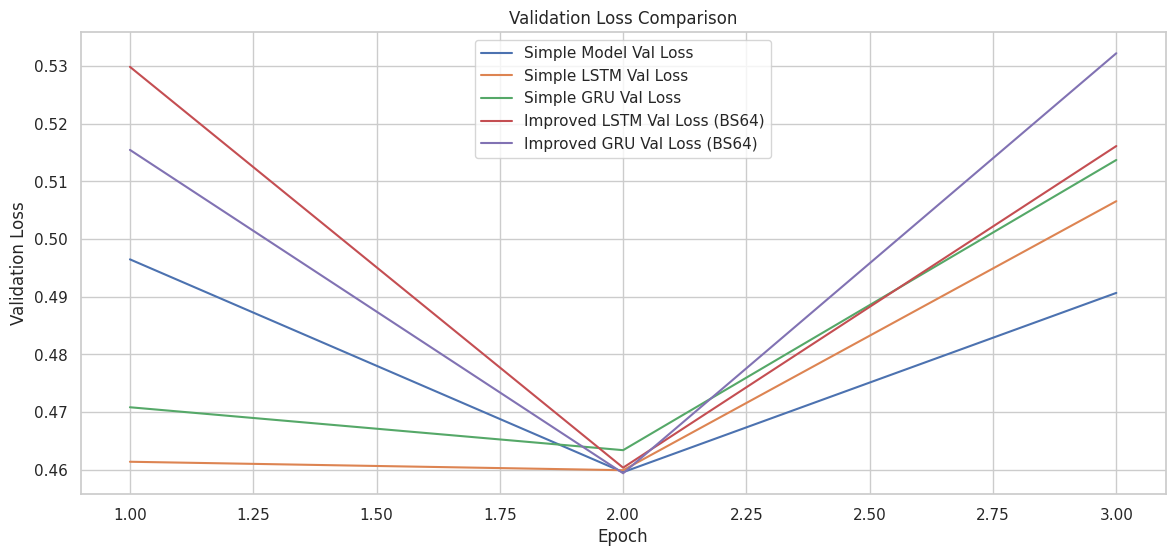

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect the performance data including the simple model
min_epochs = min(
    len(history.history['val_accuracy']),
    len(lstm_history.history['val_accuracy']),
    len(gru_history.history['val_accuracy']),
    len(improved_lstm_history_bs64.history['val_accuracy']),
    len(improved_gru_history_bs64.history['val_accuracy'])
)

# Trim each history to match the minimum number of epochs
performance_data = {
    'Epoch': list(range(1, min_epochs + 1)),
    'Simple Model Val Accuracy': history.history['val_accuracy'][:min_epochs],
    'Simple Model Val Loss': history.history['val_loss'][:min_epochs],
    'Simple LSTM Val Accuracy': lstm_history.history['val_accuracy'][:min_epochs],
    'Simple LSTM Val Loss': lstm_history.history['val_loss'][:min_epochs],
    'Simple GRU Val Accuracy': gru_history.history['val_accuracy'][:min_epochs],
    'Simple GRU Val Loss': gru_history.history['val_loss'][:min_epochs],
    'Improved LSTM Val Accuracy (BS64)': improved_lstm_history_bs64.history['val_accuracy'][:min_epochs],
    'Improved LSTM Val Loss (BS64)': improved_lstm_history_bs64.history['val_loss'][:min_epochs],
    'Improved GRU Val Accuracy (BS64)': improved_gru_history_bs64.history['val_accuracy'][:min_epochs],
    'Improved GRU Val Loss (BS64)': improved_gru_history_bs64.history['val_loss'][:min_epochs],
}

# Convert the dictionary into a DataFrame
performance_df = pd.DataFrame(performance_data)

# Display the performance comparison table
print("Performance Comparison Table:")
display(performance_df)

# Plot Validation Accuracy
plt.figure(figsize=(14, 6))
plt.plot(performance_df['Epoch'], performance_df['Simple Model Val Accuracy'], label='Simple Model Val Accuracy')
plt.plot(performance_df['Epoch'], performance_df['Simple LSTM Val Accuracy'], label='Simple LSTM Val Accuracy')
plt.plot(performance_df['Epoch'], performance_df['Simple GRU Val Accuracy'], label='Simple GRU Val Accuracy')
plt.plot(performance_df['Epoch'], performance_df['Improved LSTM Val Accuracy (BS64)'], label='Improved LSTM Val Accuracy (BS64)')
plt.plot(performance_df['Epoch'], performance_df['Improved GRU Val Accuracy (BS64)'], label='Improved GRU Val Accuracy (BS64)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()

# Plot Validation Loss
plt.figure(figsize=(14, 6))
plt.plot(performance_df['Epoch'], performance_df['Simple Model Val Loss'], label='Simple Model Val Loss')
plt.plot(performance_df['Epoch'], performance_df['Simple LSTM Val Loss'], label='Simple LSTM Val Loss')
plt.plot(performance_df['Epoch'], performance_df['Simple GRU Val Loss'], label='Simple GRU Val Loss')
plt.plot(performance_df['Epoch'], performance_df['Improved LSTM Val Loss (BS64)'], label='Improved LSTM Val Loss (BS64)')
plt.plot(performance_df['Epoch'], performance_df['Improved GRU Val Loss (BS64)'], label='Improved GRU Val Loss (BS64)')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()


## Results and Analysis

The performance comparison between the simple and improved models using LSTM and GRU architectures was analyzed based on validation accuracy and validation loss. Below are the observations and insights drawn from the comparison.

### Validation Accuracy

- The simple model using dense layers shows comparable validation accuracy to the LSTM and GRU models, particularly in the initial epochs. This indicates that even a straightforward architecture can achieve reasonable performance.
- The improved LSTM and GRU models initially show higher validation accuracy, but their performance degrades in later epochs. This suggests that while these models can capture more complex patterns initially, they are prone to overfitting as training progresses.

### Validation Loss

- The validation loss for all models starts relatively low in the initial epochs, indicating effective learning. However, as the epochs increase, the validation loss tends to increase, especially for the LSTM and GRU models, indicating a tendency toward overfitting.
- The improved LSTM and GRU models with a batch size of 64 slightly improve validation loss compared to the simple LSTM/GRU models. However, the issue of increasing loss over time persists, suggesting that further adjustments are needed to prevent overfitting.

# Conclusion

The experiments conducted with various models—ranging from a simple dense model to more complex LSTM and GRU architectures—revealed key insights into the performance and limitations of each approach in the context of disaster tweet classification.

##  Model Performance Summary

- The simple dense model achieved comparable validation accuracy to more complex models such as LSTM and GRU. This indicates that even a straightforward architecture can yield reasonable results when dealing with TF-IDF features.
- The LSTM and GRU models initially performed better than the simple model regarding validation accuracy. However, as training progressed, these models exhibited signs of overfitting, evidenced by an increasing validation loss.
- Adjusting the batch size (from 32 to 64) in the improved models helped to some extent stabilize the validation loss, but it was not sufficient to fully prevent overfitting.

## What Helped and What Didn't

- **What Helped**:
  - Using dropout layers in the LSTM and GRU models helped reduce the risk of overfitting by deactivating some neurons during training. This provided a more generalized learning outcome compared to models without dropout.
  - Increasing the batch size improved the model's stability during training, resulting in slightly lower validation loss than the initial models with a smaller batch size.

- **What Didn't Help**:
  - Simply increasing the complexity of the models (e.g., adding more neurons and layers) did not translate to improved performance. It led to overfitting, suggesting that the dataset size and feature richness might not be sufficient to support more complex architectures.
  - The LSTM and GRU models, while effective at capturing sequential information, did not significantly outperform the simple dense model when using TF-IDF features. This indicates that without more advanced text representations, the additional complexity of these models may not be fully utilized.

## Learnings and Future Improvements

Through this experimentation, it became clear that balancing model complexity and regularization techniques is essential to prevent overfitting. Here are key takeaways and potential future improvements:
- **Model Simplification**: Further simplifying the architecture while retaining essential elements, such as dropout layers, might yield a more balanced model capable of better generalization.
- **Bidirectional LSTM/GRU**: Implementing bidirectional models could help capture contextual information from both directions, potentially improving classification accuracy.
- **Cross-Validation**: Utilizing cross-validation during model training may provide more robust results by ensuring that the models generalize well across different subsets of the data.



#### for the submission

In [14]:
# Load the test dataset
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

# Apply the same cleaning function to the 'text' column in the test set
test['cleaned_text'] = test['text'].apply(clean_text)

# Transform the cleaned text in the test set using the fitted TF-IDF vectorizer
X_test = tfidf_vectorizer.transform(test['cleaned_text']).toarray()

In [15]:
# Use the best performing model (e.g., improved LSTM with batch size 64)
best_model = improved_lstm_model_bs64  # Replace with the best model you determined

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Convert probabilities to binary outcomes (0 or 1)
predictions = (predictions > 0.5).astype(int).flatten()

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [16]:
# Create a DataFrame for the submission
submission = pd.DataFrame({
    'id': test['id'],
    'target': predictions
})

# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv
